## **Sash Vazquez** --- Practica Machine Learning

In [1]:
# !pip install -q numerapi pandas pyarrow matplotlib lightgbm scikit-learn cloudpickle scipy
%matplotlib inline

### **DataSet**

- **id**: Identificador único para cada fila.
- **era**: Etiqueta que agrupa muestras relacionadas temporalmente (como periodos de tiempo específicos).
- **target**: Variable objetivo binaria o continua que indica el resultado a predecir.
- **feature**: Conjunto de variables predictoras normalizadas. Puede haber cientos de características en este tipo de datasets.

In [2]:
from numerapi import NumerAPI
napi = NumerAPI()

[f for f in napi.list_datasets() if f.startswith("v5.0")]

['v5.0/features.json',
 'v5.0/live.parquet',
 'v5.0/live_benchmark_models.parquet',
 'v5.0/live_example_preds.csv',
 'v5.0/live_example_preds.parquet',
 'v5.0/meta_model.parquet',
 'v5.0/train.parquet',
 'v5.0/train_benchmark_models.parquet',
 'v5.0/validation.parquet',
 'v5.0/validation_benchmark_models.parquet',
 'v5.0/validation_example_preds.csv',
 'v5.0/validation_example_preds.parquet']

In [3]:
import pandas as pd
import json

# Descarga los datos de entrenamiento y los metadatos de las características
napi.download_dataset("v5.0/train.parquet")
napi.download_dataset("v5.0/features.json")

# Carga solo el conjunto de features "medium" para reducir el uso de memoria y acelerar el entrenamiento del modelo 
# O bien, utiliza el conjunto de features "all" para usar todas las características
# Para pruebas rápidas puedes usar "small" (después usa "medimum")
feature_metadata = json.load(open("v5.0/features.json"))
feature_cols = feature_metadata["feature_sets"]["small"]
train = pd.read_parquet("v5.0/train.parquet", columns=["era", "target"] + feature_cols)

# Reduce la muestra, tomando cada cuatro eras, para reducir el uso de memoria y acelerar el entrenamiento del modelo (toma las eras 0001, 0005, 0009, ...)
# Comenta la línea a continuación para utilizar todos los datos.
train = train[train["era"].isin(train["era"].unique()[::4])]

# Cada fila representa una acción en un momento específico {id: stockId, era: fecha, target: medida de retorno, features: atributos de un stock}
train

2024-12-02 13:08:07,676 INFO numerapi.utils: target file already exists
2024-12-02 13:08:07,677 INFO numerapi.utils: download complete
2024-12-02 13:08:08,781 INFO numerapi.utils: target file already exists
2024-12-02 13:08:08,782 INFO numerapi.utils: download complete


,era,target,feature_antistrophic_striate_conscriptionist,feature_bicameral_showery_wallaba,feature_bridal_fingered_pensioner,feature_collectivist_flaxen_gueux,feature_concurring_fabled_adapter,feature_crosscut_whilom_ataxy,feature_departmental_inimitable_sentencer,feature_dialectal_homely_cambodia,...,feature_tridactyl_immoral_snorting,feature_trimeter_soggy_greatest,feature_unanalyzable_excusable_whirlwind,feature_unbreakable_constraining_hegelianism,feature_unformed_bent_smatch,feature_unministerial_unextenuated_teleostean,feature_unmodish_zymogenic_rousing,feature_unsystematized_subcardinal_malaysia,feature_willful_sere_chronobiology,feature_zoological_peristomial_scute
id,,,,,,,,,,,,,,,,,,,,,
n0007b5abb0c3a25,0001,0.25,2,2,2,2,2,0,1,2,...,4,1,1,3,0,2,2,3,3,2
n003bba8a98662e4,0001,0.25,2,2,2,2,2,1,4,2,...,4,2,0,0,0,2,2,4,4,2
n003bee128c2fcfc,0001,0.75,2,2,2,2,2,2,2,2,...,3,1,1,0,1,2,2,0,3,2
n0048ac83aff7194,0001,0.25,2,2,2,2,2,1,4,2,...,1,3,4,1,2,2,2,2,0,2
n0055a2401ba6480,0001,0.25,2,2,2,2,2,0,0,2,...,1,0,1,0,0,2,2,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nffc2d5e4b79a7ae,0573,0.00,1,2,1,0,3,2,1,1,...,2,2,1,2,3,3,3,2,2,1
nffc9844c1c7a6a9,0573,0.25,2,1,2,1,4,2,2,4,...,4,0,0,3,1,3,3,2,3,2
nffd79773f4109bb,0573,0.50,3,4,0,3,4,1,0,1,...,3,0,0,0,1,1,4,0,1,2


**¿Qué son las eras?**
- Eras representan periodos de tiempo semanales dentro del dataset.
- Cada era agrupa filas que corresponden a las características y objetivos de diferentes acciones (stocks) evaluadas en una misma semana.
- Son útiles para modelar decisiones de inversión periódicas y evaluar el rendimiento de un modelo en un contexto temporal.

<Axes: title={'center': 'Numero de filas por era'}, xlabel='Era'>

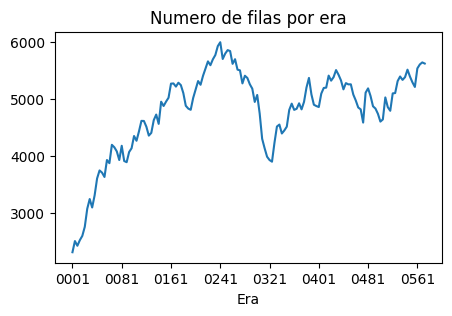

In [4]:
train.groupby("era").size().plot(title="Numero de filas por era", figsize=(5, 3), xlabel="Era")

**Valores nulos**

In [5]:
null_values = train.isnull().sum()
print(null_values)

era                                              0
target                                           0
feature_antistrophic_striate_conscriptionist     0
feature_bicameral_showery_wallaba                0
feature_bridal_fingered_pensioner                0
feature_collectivist_flaxen_gueux                0
feature_concurring_fabled_adapter                0
feature_crosscut_whilom_ataxy                    0
feature_departmental_inimitable_sentencer        0
feature_dialectal_homely_cambodia                0
feature_donnard_groutier_twinkle                 0
feature_elusive_vapoury_accomplice               0
feature_geminate_crummiest_scourer               0
feature_glandered_unimproved_peafowl             0
feature_hempen_unionist_cone                     0
feature_illuminated_gambrel_noria                0
feature_jacobinical_symmetric_roll               0
feature_jewish_stained_disembowelment            0
feature_lacklustre_centroidal_schweitzer         0
feature_limiest_heliolithic_yor

2024-12-02 13:08:10,432 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-02 13:08:10,433 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


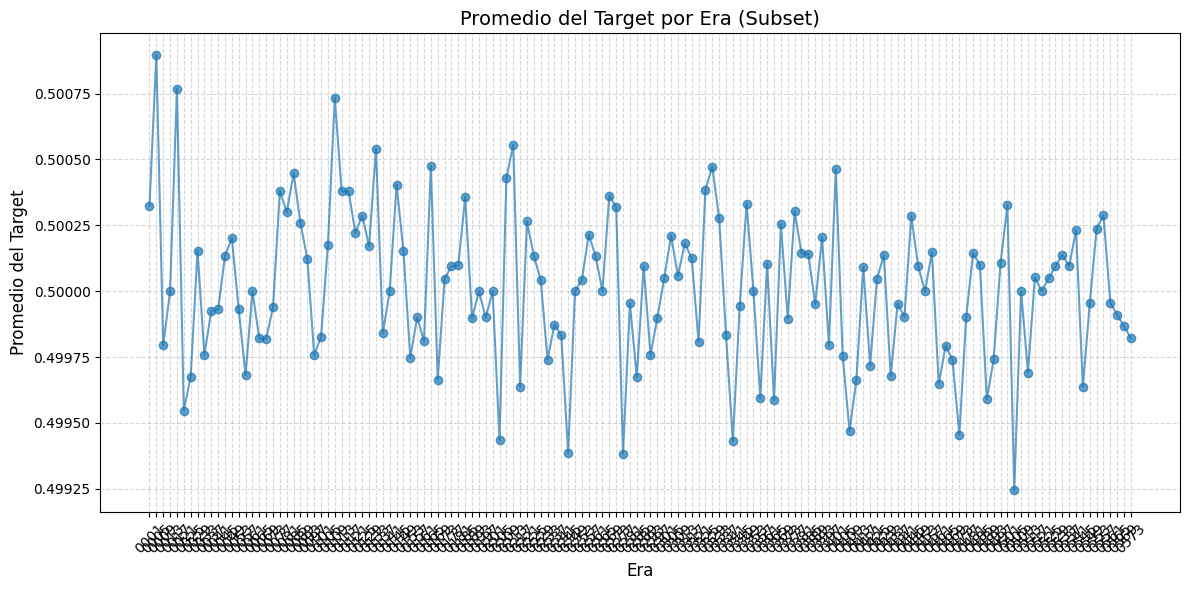

In [6]:
import matplotlib.pyplot as plt

era_mean_target = train.groupby('era')['target'].mean()

plt.figure(figsize=(12, 6))
plt.plot(era_mean_target.index, era_mean_target.values, marker='o', linestyle='-', alpha=0.7)
plt.title('Promedio del Target por Era (Subset)', fontsize=14)
plt.xlabel('Era', fontsize=12)
plt.ylabel('Promedio del Target', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**¿Qué observar en este análisis?**
- *Estabilidad*:
	Observamos una variación moderada entre las eras. Aunque hay fluctuaciones alrededor del valor central (~0.500), la amplitud de los cambios no parece extremadamente grande. Esto podría indicar que, aunque hay cierta dependencia temporal, no es excesiva.

- *Valores atípicos*:
	Hay algunas eras que presentan valores más altos o más bajos que la media general. Estas podrían reflejar condiciones especiales del mercado o eventos específicos que impactaron los datos.

- *Tendencias*:
	A simple vista, no parece haber una tendencia sostenida a lo largo del tiempo (ni un aumento ni una disminución (variacion significativa) del promedio del target). Esto sugiere que las dinámicas subyacentes del mercado pueden ser relativamente consistentes.

**¿Qué son las features?**

Las features son atributos cuantitativos que describen diversas propiedades de cada acción.

Tipos de datos representados:
- *Datos fundamentales*: Ej. relación Precio/Beneficio (P/E ratio), utilidades por acción.
- *Señales técnicas*: Ej. Índice de Fuerza Relativa (RSI), medias móviles.
- *Datos de mercado*: Ej. volumen de operaciones, interés a corto.
- *Datos secundarios*: Ej. calificaciones de analistas.

Cómo tratar las features en este dataset
- Selección de características como un PCA pueden ser útil para reducir la dimensionalidad.
- Análisis de correlación entre las features para detectar redundancias.
    	

In [7]:
len(feature_cols)

42

<Axes: title={'center': 'missing data'}, ylabel='Frequency'>

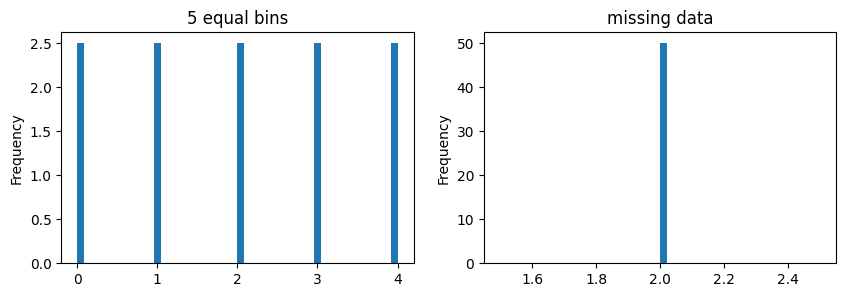

In [8]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
first_era = train[train["era"] == train["era"].unique()[0]]
last_era = train[train["era"] == train["era"].unique()[-1]]
last_era[feature_cols[-1]].plot(kind="hist", title="5 equal bins", density=True, bins=50, ax=ax1)
first_era[feature_cols[-1]].plot(kind="hist", title="missing data", density=True, bins=50, ax=ax2)

**Análisis de correlación entre features**, identificar los grupos de features similares para decidir qué eliminar

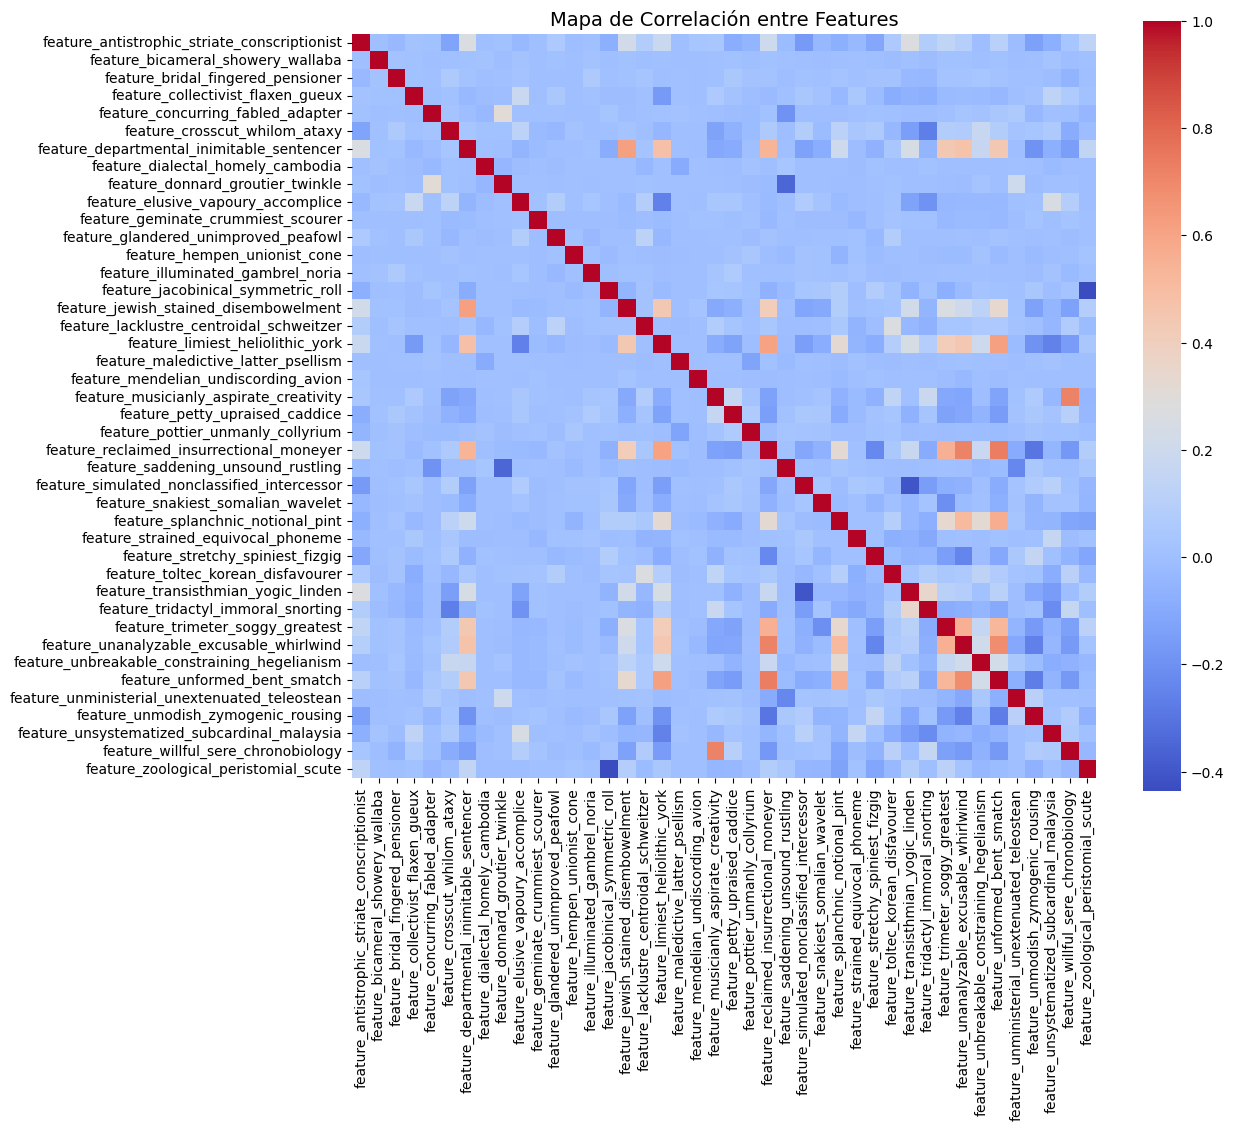

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = train[feature_cols[:50]]  
correlation_matrix = selected_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", square=True, cbar=True)
plt.title('Mapa de Correlación entre Features', fontsize=14)
plt.show()

**Evaluación de la importancia (determinar cuáles contribuyen más a la predicción del target) de las features**

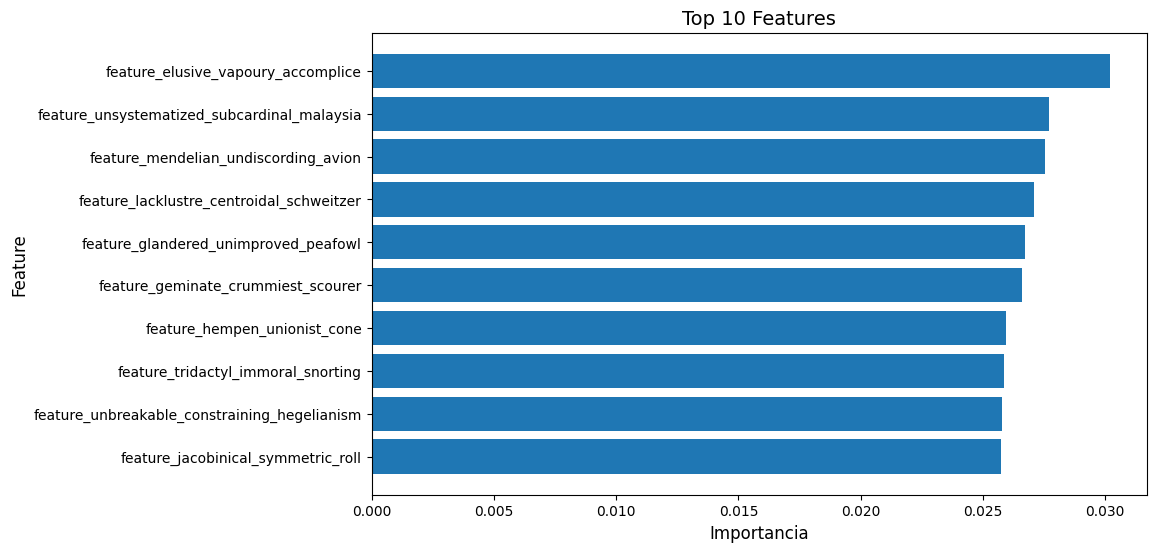

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

X = train[feature_cols]
y = train["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

feature_importances = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10][::-1], feature_importances['Importance'][:10][::-1])
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 10 Features', fontsize=14)
plt.show()

**Selección de features basadas en correlación**, eliminando las features con alta correlación (redundantes) para reducir la dimensionalidad.

In [11]:
import numpy as np

correlation_threshold = 0.95
upper_triangle = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > correlation_threshold)]

# Crear un nuevo dataset sin las features redundantes
reduced_features = train.drop(columns=to_drop)
print(f"Se eliminaron {len(to_drop)} features por alta correlación.")

Se eliminaron 0 features por alta correlación.


**Esto demuestra que todas las features son necesarias y que solo en el dataset entero sea necesario elimiar features**

**¿Qué es el target?**

El target en este dataset representa una medida de los rendimientos específicos de acciones a 20 días hábiles, ajustados para eliminar el impacto de:
- Tendencias más amplias del mercado.
- Factores como país, sector, o condiciones económicas generales.

El objetivo es capturar rendimientos específicos de cada acción en relación con su contexto, proporcionando un indicador puramente atribuible al comportamiento individual de la acción.

Cómo está definido el target en este dataset
- Agrupación en contenedores discretos:
	El target tiene 5 valores posibles, que corresponden a contenedores desiguales *(0, 0.25, 0.5, 0.75, 1.0)*
	Cada valor indica un rango de rendimiento relativo: (0: Rendimiento muy bajo), (1.0: Rendimiento muy alto) y los valores intermedios reflejan posiciones relativas intermedias.
- Estandarización, los valores han sido discretizados y estandarizados intencionalmente para:
    * Reducir el ruido inherente a los datos financieros.
    * Evitar overfitting en modelos complejos.

**Distribución del Target**

2024-12-02 13:09:28,300 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/var/folders/n6/ntyg8jy50s7595_q_x75bhkh0000gn/T/ipykernel_93400/3990363290.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_distribution.index, y=target_distribution.values, palette="viridis")
2024-12-02 13:09:28,304 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


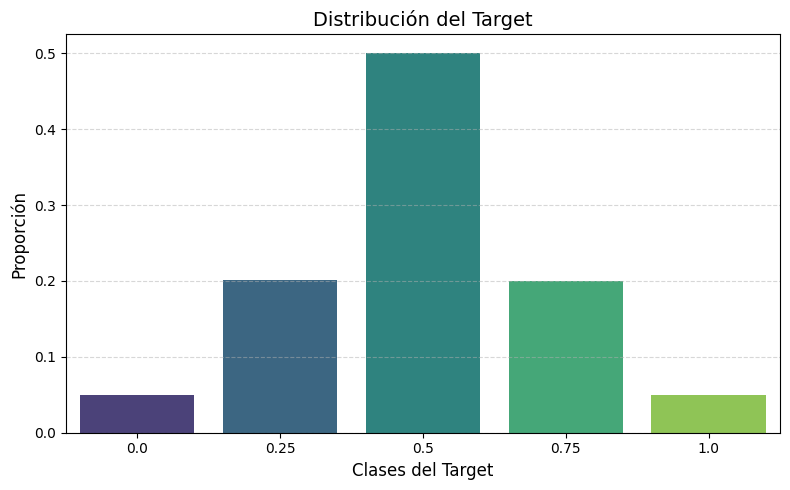

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

target_distribution = train['target'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette="viridis")
plt.title("Distribución del Target", fontsize=14)
plt.xlabel("Clases del Target", fontsize=12)
plt.ylabel("Proporción", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**¿Qué observar en este análisis?**

- La clase con valor 0.5 tiene la mayor proporción (alrededor del 50%), seguida de las clases 0.25 y 0.75, mientras que las clases 0.0 y 1.0 están menos representadas.

- Esto indica un desbalance de clases, especialmente para las clases menos representadas (0.0 y 1.0), lo que podría afectar negativamente el rendimiento de un modelo predictivo, especialmente en tareas supervisadas como clasificación.


**Distribución del Target por Era**

<Figure size 1200x600 with 0 Axes>

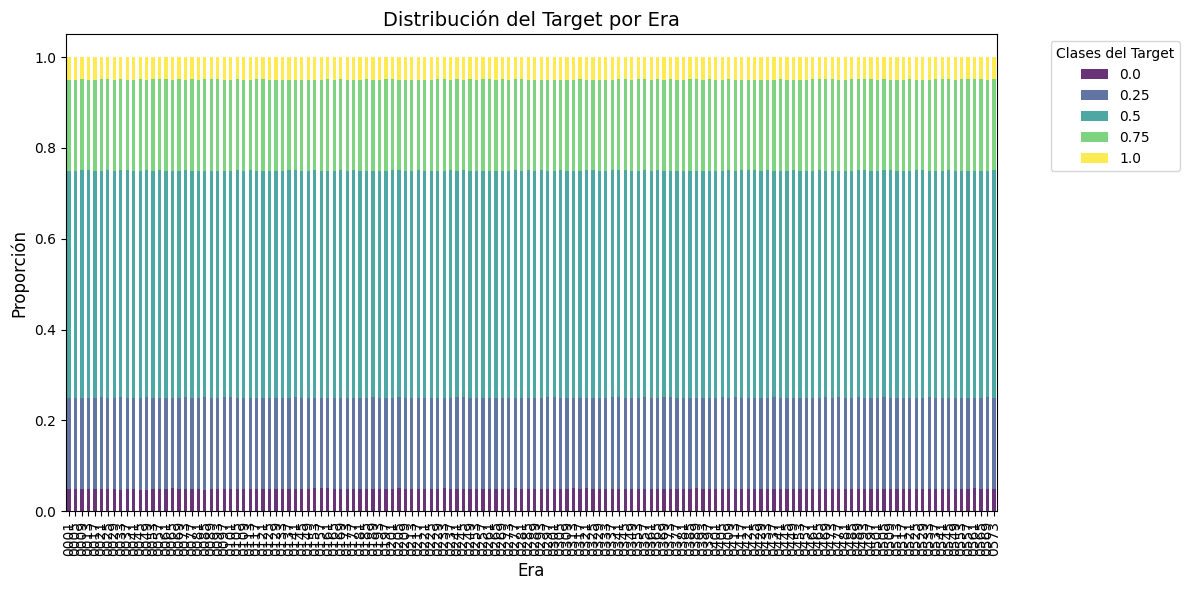

In [13]:
target_by_era = train.groupby("era")["target"].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 6))
target_by_era.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis", alpha=0.8)
plt.title("Distribución del Target por Era", fontsize=14)
plt.xlabel("Era", fontsize=12)
plt.ylabel("Proporción", fontsize=12)
plt.legend(title="Clases del Target", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

**¿Qué observar en este análisis?**

- Las proporciones de las clases no cambian significativamente entre las eras, sugiere estabilidad temporal en los datos.

**Correlación entre el Target y las Features**

/var/folders/n6/ntyg8jy50s7595_q_x75bhkh0000gn/T/ipykernel_93400/568185032.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.index, y=top_features.values, palette="viridis")


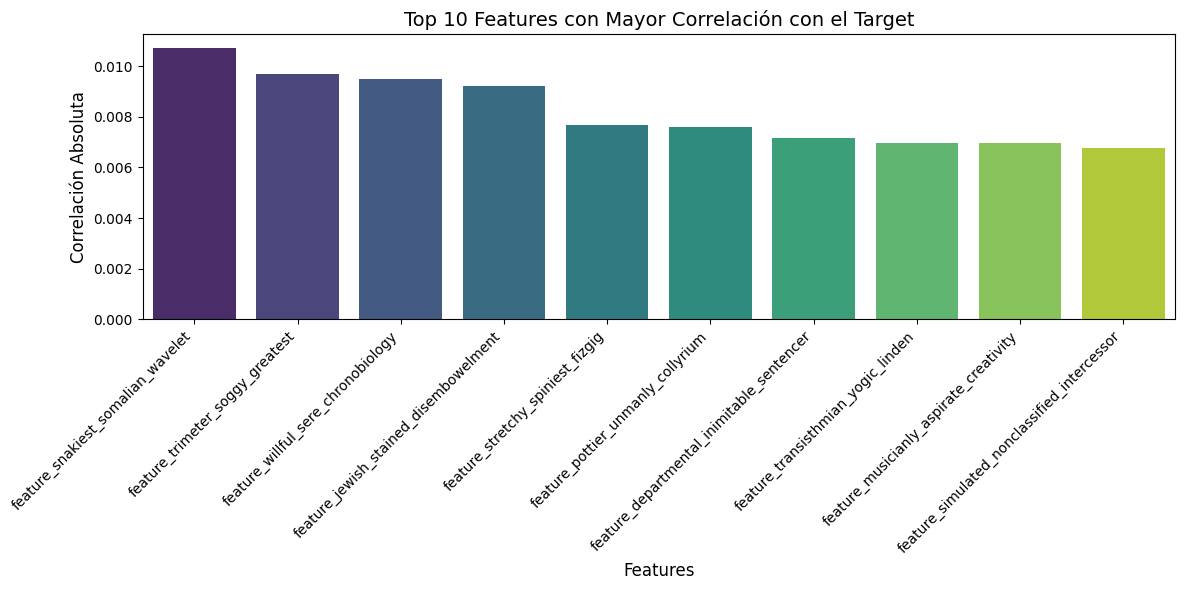

In [14]:
# Calcular la correlación de cada feature con el target
correlations = train[feature_cols].corrwith(train["target"]).abs()

# Seleccionar las top 10 features con mayor correlación
top_features = correlations.nlargest(10)

plt.figure(figsize=(12, 6))  # Aumentar el tamaño de la figura
sns.barplot(x=top_features.index, y=top_features.values, palette="viridis")
plt.title("Top 10 Features con Mayor Correlación con el Target", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Correlación Absoluta", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Asegura que las etiquetas se vean bien rotadas
plt.tight_layout()
plt.show()

**¿Por qué escalar los datos?**
- Homogeneidad entre las features:
    * Las features en este dataset ya están normalizadas o estandarizadas en su mayoría (especialmente porque provienen de indicadores financieros que han sido preprocesados). Sin embargo, si introducimos nuevas variables (como interacciones entre features), si que se podría necesitar un escalado adicional.
- Compatibilidad con algoritmos:
	* Algunos algoritmos de machine learning, como Regresión Logística, SVM, o Redes Neuronales, son sensibles a la escala de los datos.
	* Modelos basados en árboles (Random Forest, XGBoost, LightGBM) no necesitan datos escalados, pero un escalado uniforme puede ayudar en la comparación de métricas o al usar múltiples algoritmos.
- Evitar sesgos por escala:
	* Aunque las features originales están normalizadas, validar esta normalización asegura que no haya desequilibrios entre columnas que puedan afectar los resultados.

**¿Cuándo no sería necesario escalar?**
- Si usamos modelos basados en árboles (Random Forest, LightGBM, etc...), no es estrictamente necesario escalar los datos, ya que estos modelos no se ven afectados por la escala.
- Si las features ya están bien normalizadas (rango [0, 1] o distribución estándar), un escalado adicional puede ser redundante. *(spoiler, lo estan)* 

**Verificar la escala de las features actuales**

In [15]:
feature_stats = train[feature_cols].describe().T
print(feature_stats[['min', 'max', 'mean', 'std']])

                                               min  max      mean       std
feature_antistrophic_striate_conscriptionist   0.0  4.0  1.999916  1.401563
feature_bicameral_showery_wallaba              0.0  4.0  1.999951  1.097296
feature_bridal_fingered_pensioner              0.0  4.0  1.999936  1.312527
feature_collectivist_flaxen_gueux              0.0  4.0  1.999930  1.373752
feature_concurring_fabled_adapter              0.0  4.0  1.999936  1.322029
feature_crosscut_whilom_ataxy                  0.0  4.0  1.999910  1.414352
feature_departmental_inimitable_sentencer      0.0  4.0  1.999910  1.414352
feature_dialectal_homely_cambodia              0.0  4.0  1.999936  1.322029
feature_donnard_groutier_twinkle               0.0  4.0  1.999936  1.322029
feature_elusive_vapoury_accomplice             0.0  4.0  1.999910  1.414352
feature_geminate_crummiest_scourer             0.0  4.0  1.999916  1.401563
feature_glandered_unimproved_peafowl           0.0  4.0  1.974412  1.436457
feature_hemp

**Escalar las features (aunque en este caso no es necesario)**

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()  # puede ser util Cambiar a MinMaxScaler([0, 1]) si queremos un rango [0, 1]

scaled_features = scaler.fit_transform(train[feature_cols])

# Reemplazar las features en el dataset con las escaladas
train_scaled = train.copy()
train_scaled[feature_cols] = scaled_features

scaled_stats = pd.DataFrame(scaled_features, columns=feature_cols).describe().T
print(scaled_stats[['min', 'max', 'mean', 'std']])

                                                    min       max  \
feature_antistrophic_striate_conscriptionist  -1.426919  1.427040   
feature_bicameral_showery_wallaba             -1.822619  1.822709   
feature_bridal_fingered_pensioner             -1.523730  1.523828   
feature_collectivist_flaxen_gueux             -1.455817  1.455918   
feature_concurring_fabled_adapter             -1.512778  1.512875   
feature_crosscut_whilom_ataxy                 -1.414012  1.414140   
feature_departmental_inimitable_sentencer     -1.414012  1.414140   
feature_dialectal_homely_cambodia             -1.512778  1.512875   
feature_donnard_groutier_twinkle              -1.512778  1.512875   
feature_elusive_vapoury_accomplice            -1.414012  1.414140   
feature_geminate_crummiest_scourer            -1.426919  1.427040   
feature_glandered_unimproved_peafowl          -1.374503  1.410129   
feature_hempen_unionist_cone                  -1.426919  1.427040   
feature_illuminated_gambrel_noria 

**¿Por qué usar PCA?**
- Reducción de dimensionalidad:
	* El dataset contiene cientos de features, lo que puede ser costoso computacionalmente. PCA permite reducir la cantidad de features manteniendo la mayor parte de la información (varianza).
- Eliminación de redundancia:
    * Muchas features pueden estar correlacionadas entre sí. PCA transforma las variables originales en componentes principales no correlacionadas. (en el caso small y medium no pasa)

**¿Cuándo es útil PCA en este dataset?**
- Dimensionalidad muy alta:
    * Si usanmos feature_sets *all* podria ser muy util.
    

**Aplicar PCA para reducir dimensionalidad**

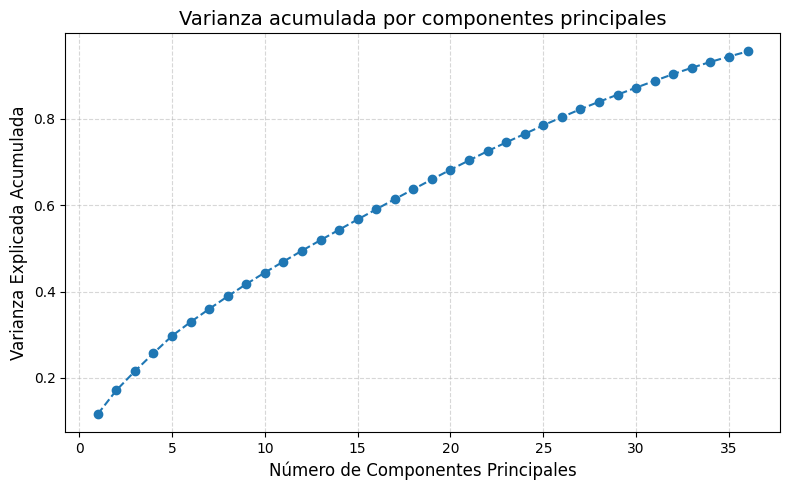

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=0.95)  # ojo!!! 0.95 es el porcentaje de varianza explicada
pca_features = pca.fit_transform(train_scaled[feature_cols])

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Varianza acumulada por componentes principales', fontsize=14)
plt.xlabel('Número de Componentes Principales', fontsize=12)
plt.ylabel('Varianza Explicada Acumulada', fontsize=12)
plt.grid(alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

**Crear un nuevo dataset con las componentes principales**

In [18]:
import pandas as pd

pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]

pca_df = pd.DataFrame(pca_features, columns=pca_columns)

pca_df['target'] = train_scaled['target'].reset_index(drop=True)

print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.169451  1.534686  0.392686  0.118462 -0.185706 -0.036663 -0.268641   
1 -2.514702  0.959840 -0.981506 -0.663685  0.982471  0.038413  1.024372   
2 -0.659124  1.870307  0.026866  0.313823 -0.381552 -0.146279 -0.414961   
3  2.185762 -1.322193 -1.673856  0.193442  0.167612 -0.637482  1.097671   
4 -3.155426  1.221979  0.147588 -0.455394  0.104920 -0.972885  0.058491   

        PC8       PC9      PC10  ...      PC28      PC29      PC30      PC31  \
0 -0.890265 -0.248628  0.066831  ...  0.366073 -0.122395 -0.848405 -0.218325   
1 -0.320357  0.065405 -0.375677  ... -0.903633  0.504229  0.909347  0.720797   
2 -0.252527  0.288812  0.425456  ... -1.411082  0.406341  0.128925  0.592783   
3  0.265103  0.602507  0.073060  ...  0.268144 -0.302039  0.271971 -0.256819   
4 -0.235551 -0.263527 -0.435994  ...  0.780511  0.044025 -0.322840  0.415991   

       PC32      PC33      PC34      PC35      PC36  target  
0  0.2

**Porque no aplicar PCA**

El PCA es más efectivo cuando se trabaja con variables numéricas altamente correlacionadas entre sí. Si el dataset contiene características mayoritariamente categóricas o las variables no están correlacionadas, la reducción de dimensionalidad mediante PCA no aportará beneficios significativos. Además, el PCA asume que los patrones de variación en los datos son lineales, por lo que si el conjunto de datos presenta relaciones no lineales complejas, el PCA no será capaz de capturarlas adecuadamente, lo que limita su efectividad en estos casos.

Ademas el dataset ya esta normalizado.

### **Modeling**

##### Ventajas de Modelos de Árboles en Predicción Bursátil

- **Captura de No Linealidades**: Identifican relaciones complejas entre características financieras sin asumir linealidad.
- **Resiliencia al Ruido**: Ignoran variables irrelevantes y manejan datos bursátiles ruidosos de manera eficiente.
- **Consistencia y Robustez**: Menor riesgo de overfitting gracias a técnicas de ensamble como Random Forests o Boosting.
- **Adaptación a Escalas**: No requieren normalización de las variables, simplificando el preprocesamiento.

##### Por qué Funcionan Bien en Mercados Financieros

- **Flexibilidad Temporal**: Aprenden patrones históricos y dinámicas locales del mercado.
- **Tolerancia al Ruido**: Su estructura jerárquica permite separar señales relevantes del ruido.
- **Regularización Incorporada**: Modelos como XGBoost o LGBMR evitan aprender patrones erróneos.
- **Predicciones de Corto Plazo**: Capturan patrones a corto plazo, que son más estables y menos dependientes de cambios macroeconómicos impredecibles. (importante)
 
##### Limitaciones a Considerar

- Pueden sobreajustarse a eventos raros si no se regularizan bien.
- Funcionan mejor en predicciones de corto plazo; para largo plazo, combina con modelos temporales.

##### Conclusión

Son ideales para predecir comportamientos bursátiles al capturar relaciones complejas y manejar ruido. Ajustar hiperparámetros y realizar buena ingeniería de características es clave para maximizar su rendimiento.

In [19]:
import lightgbm as lgb # brew install libomp (macOS) 

# este modelo necesita 71Gb de RAM ojo!!!
# model = lgb.LGBMRegressor(
#   n_estimators=30000,
#   learning_rate=0.01,  
#   max_depth=10,
#   num_leaves=512,  
#   colsample_bytree=0.1,
#   min_data_in_leaf=5000,  
#   force_row_wise=True,  
# )

# Reduje el número de estimadores y aumenté el learning rate para acelerar la convergencia manteniendo la precisión. 
# Ajusté la profundidad máxima y el número de hojas para controlar la complejidad del modelo y evitar el sobreajuste. 
# Incrementé colsample_bytree y añadí subsample para mejorar la diversidad de los árboles. 
# Incorporé regularización L1 y L2 (reg_alpha y reg_lambda) para estabilizar el modelo, 
# y disminuí min_data_in_leaf para permitir divisiones más útiles en los árboles.
model = lgb.LGBMRegressor(
  n_estimators=15000,
  learning_rate=0.05,
  max_depth=12,
  num_leaves=256,
  colsample_bytree=0.7,
  min_data_in_leaf=500,
  subsample=0.8,
  subsample_freq=1,
  reg_alpha=0.05,
  reg_lambda=0.2,
  force_row_wise=True,
  random_state=42,
  verbose=1
)

# modelo base
# model = lgb.LGBMRegressor(
#   n_estimators=20000,
#   learning_rate=0.1,
#   max_depth=5,
#   num_leaves=2**5-10,
#   colsample_bytree=0.1,
#   force_col_wise=True
# )

model.fit(train_scaled[feature_cols], train_scaled["target"])

[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500
[LightGBM] [Info] Total Bins 252
[LightGBM] [Info] Number of data points in the train set: 688184, number of used features: 42
[LightGBM] [Info] Start training from score 0.500008


LGBMRegressor(colsample_bytree=0.7, force_row_wise=True, learning_rate=0.05,
              max_depth=12, min_data_in_leaf=500, n_estimators=15000,
              num_leaves=256, random_state=42, reg_alpha=0.05, reg_lambda=0.2,
              subsample=0.8, subsample_freq=1, verbose=1)

In [20]:
napi.download_dataset("v5.0/validation.parquet")

# Carga los datos de validación y filtra las eras que no se utilizaron en el entrenamiento
validation = pd.read_parquet("v5.0/validation.parquet", columns=["era", "data_type", "target"] + feature_cols) 
validation = validation[validation["data_type"] == "validation"]
del validation["data_type"]

# Reduce la muestra a cada octava era para reducir el uso de memoria y acelerar la evaluación
# Comenta la siguiente línea para usar todos los datos (mayor uso de memoria, inferencia más lenta, evaluación más precisa)
# validation = validation[validation["era"].isin(validation["era"].unique()[::8])]

# Las eras están separadas por una semana, pero los "targets" miran 4 semanas en el futuro, por lo que debemos "embargar" las 4 eras posteriores a nuestra última "era" para evitar fuga de datos.
last_train_era = int(train_scaled["era"].unique()[-1])
eras_to_embargo = [str(era).zfill(4) for era in [last_train_era + i for i in range(4)]]
validation = validation[~validation["era"].isin(eras_to_embargo)]

# Genera predicciones respecto a las características de validación fuera de la muestra.
validation["prediction"] = model.predict(validation[feature_cols])
validation[["era", "prediction", "target"]]

2024-12-02 13:37:21,834 INFO numerapi.utils: target file already exists
2024-12-02 13:37:21,836 INFO numerapi.utils: download complete


[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500


,era,prediction,target
id,,,
n0003806f5bad605,0577,0.547926,0.50
n000be59a0bee991,0577,0.332568,0.75
n00140a076404e34,0577,0.582023,0.50
n0026f6c0fbc483a,0577,0.478390,0.25
n002b74421382a36,0577,0.513939,0.25
...,...,...,...
nffe9fd6fe5bccc9,1138,0.552208,0.75
nffea17f8b36003a,1138,0.473237,0.50
nffeef5c0aeae906,1138,0.473210,0.00


2024-12-02 14:25:48,365 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-02 14:25:48,366 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-02 14:25:48,367 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-02 14:25:48,368 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


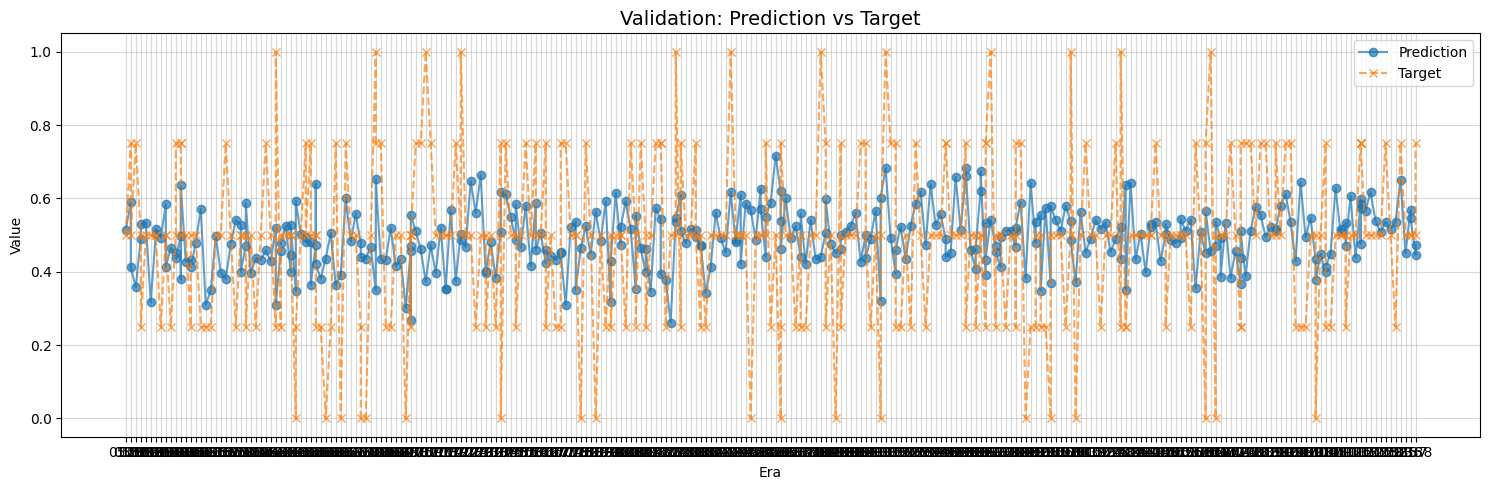

In [ ]:
validation_subset = validation.sample(frac=0.0001, random_state=42)
validation_subset = validation_subset.sort_values(by="era")

plt.figure(figsize=(15, 5))
plt.plot(validation_subset["era"], validation_subset["prediction"], label="Prediction", marker='o', linestyle='-', alpha=0.7)
plt.plot(validation_subset["era"], validation_subset["target"], label="Target", marker='x', linestyle='--', alpha=0.7)
plt.xlabel("Era", fontsize=10)
plt.ylabel("Value", fontsize=10)
plt.title("Validation: Prediction vs Target", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

In [22]:
from xgboost import XGBRegressor

modelXG = XGBRegressor(
    n_estimators=10000,        
    learning_rate=0.01,        
    max_depth=8,               
    colsample_bytree=0.3,      
    min_child_weight=5000,     
    tree_method="hist",        
    grow_policy="depthwise",   
    subsample=0.8,             
    random_state=42         
)

# modelXG = XGBRegressor(
#     n_estimators=20000,      
#     learning_rate=0.1,       
#     max_depth=5,            
#     colsample_bytree=0.1,    
#     tree_method='hist',      
#     objective='reg:squarederror',
#     verbosity=1             
# )

modelXG.fit(train_scaled[feature_cols], train_scaled["target"])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy='depthwise', importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=5000, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [23]:
# Carga los datos de validación y filtra las eras que no se utilizaron en el entrenamiento
validationXG = pd.read_parquet("v5.0/validation.parquet", columns=["era", "data_type", "target"] + feature_cols) 
validationXG = validationXG[validationXG["data_type"] == "validation"]
del validationXG["data_type"]

# Reduce la muestra a cada octava era para reducir el uso de memoria y acelerar la evaluación
# Comenta la siguiente línea para usar todos los datos (mayor uso de memoria, inferencia más lenta, evaluación más precisa)
# validationXG = validationXG[validationXG["era"].isin(validationXG["era"].unique()[::8])]

# Las eras están separadas por una semana, pero los "targets" miran 4 semanas en el futuro, por lo que debemos "embargar" las 4 eras posteriores a nuestra última "era" para evitar fuga de datos.
last_train_era = int(train_scaled["era"].unique()[-1])
eras_to_embargo = [str(era).zfill(4) for era in [last_train_era + i for i in range(4)]]
validationXG = validationXG[~validationXG["era"].isin(eras_to_embargo)]

# Genera predicciones respecto a las características de validación fuera de la muestra.
validationXG["prediction"] = modelXG.predict(validationXG[feature_cols])
validationXG[["era", "prediction", "target"]]

,era,prediction,target
id,,,
n0003806f5bad605,0577,0.506931,0.50
n000be59a0bee991,0577,0.501769,0.75
n00140a076404e34,0577,0.512899,0.50
n0026f6c0fbc483a,0577,0.511135,0.25
n002b74421382a36,0577,0.489399,0.25
...,...,...,...
nffe9fd6fe5bccc9,1138,0.518080,0.75
nffea17f8b36003a,1138,0.520663,0.50
nffeef5c0aeae906,1138,0.496861,0.00


2024-12-02 14:31:16,184 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-02 14:31:16,185 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-02 14:31:16,186 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-02 14:31:16,187 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


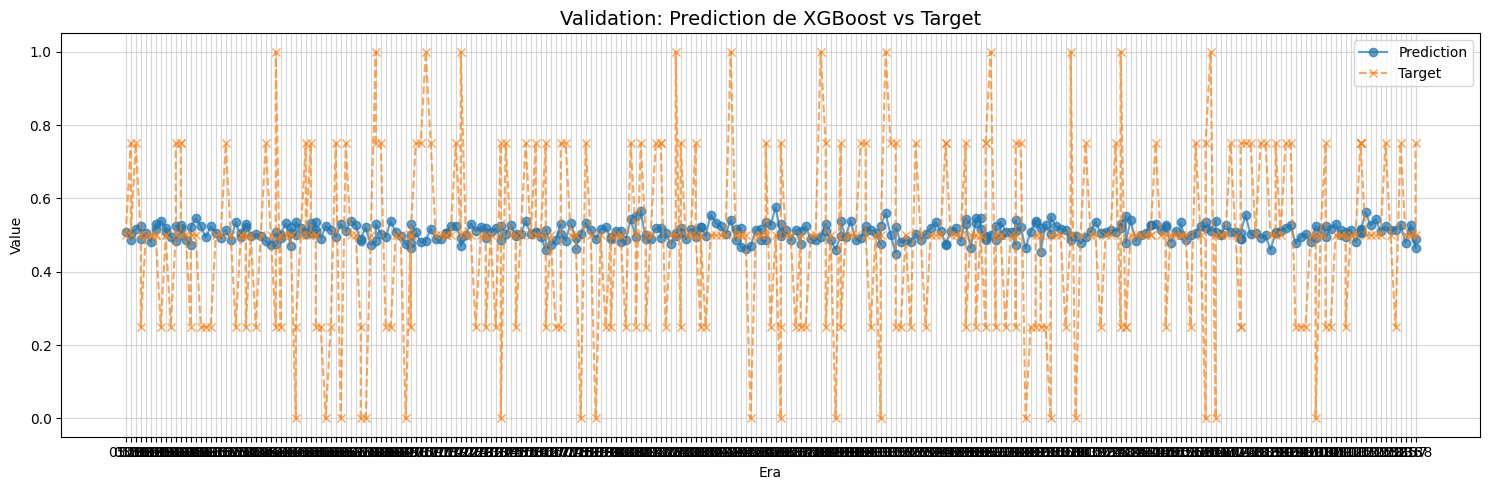

In [ ]:
validationXG_subset = validationXG.sample(frac=0.0001, random_state=42)
validationXG_subset = validationXG_subset.sort_values(by="era")

plt.figure(figsize=(15, 5))
plt.plot(validationXG_subset["era"], validationXG_subset["prediction"], label="Prediction", marker='o', linestyle='-', alpha=0.7)
plt.plot(validationXG_subset["era"], validationXG_subset["target"], label="Target", marker='x', linestyle='--', alpha=0.7)
plt.xlabel("Era", fontsize=10)
plt.ylabel("Value", fontsize=10)
plt.title("Validation: Prediction de XGBoost vs Target", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# rf = RandomForestRegressor()

# param_grid = {
#     'n_estimators': [100, 200, 300, 500, 1000],
#     'max_depth': [5, 10, 15, 20, 25],
#     'max_features': ['sqrt', 'log2'],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 4, 8, 16]
# } 

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(train_pca_corr_selected[feature_cols], train_pca_corr_selected["target"])
# print(grid_search.best_params_) 

# Mejores parámetros encontrados para small:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300 }
# Mejores parámetros encontrados para medium: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300 }
# Mejores parámetros encontrados para all:    {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300 }

# modelRF = RandomForestRegressor(**best_params)

modelRF = RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=300) # small
# modelRF = RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=300) # medium 
# modelRF = RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=4, min_samples_split=5, n_estimators=500) # all

modelRF.fit(train_scaled[feature_cols], train_scaled["target"])

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=300)

In [26]:
# Carga los datos de validación y filtra las eras que no se utilizaron en el entrenamiento
validationRf = pd.read_parquet("v5.0/validation.parquet", columns=["era", "data_type", "target"] + feature_cols) 
validationRf = validationRf[validationRf["data_type"] == "validation"]
del validationRf["data_type"]

# Reduce la muestra a cada octava era para reducir el uso de memoria y acelerar la evaluación
# Comenta la siguiente línea para usar todos los datos (mayor uso de memoria, inferencia más lenta, evaluación más precisa)
# validationRf = validationRf[validationRf["era"].isin(validationRf["era"].unique()[::8])]

# Las eras están separadas por una semana, pero los "targets" miran 4 semanas en el futuro, por lo que debemos "embargar" las 4 eras posteriores a nuestra última "era" para evitar fuga de datos.
last_train_era = int(train_scaled["era"].unique()[-1])
eras_to_embargo = [str(era).zfill(4) for era in [last_train_era + i for i in range(4)]]
validationRf = validationRf[~validationRf["era"].isin(eras_to_embargo)]

# Genera predicciones respecto a las características de validación fuera de la muestra.
validationRf["prediction"] = modelRF.predict(validationRf[feature_cols])
validationRf[["era", "prediction", "target"]]

,era,prediction,target
id,,,
n0003806f5bad605,0577,0.500515,0.50
n000be59a0bee991,0577,0.510774,0.75
n00140a076404e34,0577,0.502816,0.50
n0026f6c0fbc483a,0577,0.514582,0.25
n002b74421382a36,0577,0.508453,0.25
...,...,...,...
nffe9fd6fe5bccc9,1138,0.525200,0.75
nffea17f8b36003a,1138,0.509721,0.50
nffeef5c0aeae906,1138,0.499129,0.00


2024-12-02 14:34:34,247 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-02 14:34:34,248 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-02 14:34:34,249 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-12-02 14:34:34,249 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


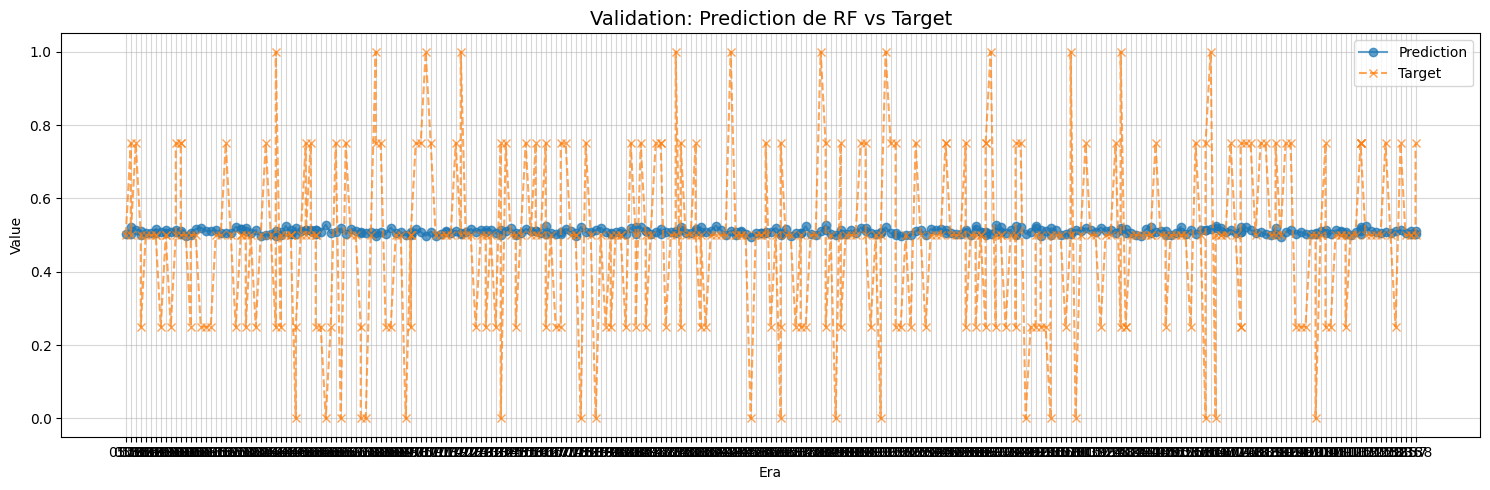

In [44]:
validationRf_subset = validationRf.sample(frac=0.0001, random_state=42)
validationRf_subset = validationRf_subset.sort_values(by="era")

plt.figure(figsize=(15, 5))
plt.plot(validationRf_subset["era"], validationRf_subset["prediction"], label="Prediction", marker='o', linestyle='-', alpha=0.7)
plt.plot(validationRf_subset["era"], validationRf_subset["target"], label="Target", marker='x', linestyle='--', alpha=0.7)
plt.xlabel("Era", fontsize=10)
plt.ylabel("Value", fontsize=10)
plt.title("Validation: Prediction de RF vs Target", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

El **overfitting** es un problema común en el aprendizaje automático donde un modelo se ajusta demasiado bien a los datos de entrenamiento, capturando no solo las tendencias generales sino también el ruido y las fluctuaciones aleatorias. Como resultado, el modelo tiene un rendimiento excelente en los datos de entrenamiento pero falla al generalizar a datos nuevos, lo que lleva a un rendimiento malo en el conjunto de validación o test.

**Cómo evitar el overfitting**
- **División de Datos**: Dividir los datos en conjuntos de entrenamiento, validación y prueba. Esto permite evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento.

- **Regularización**: Aplicar técnicas de regularización como L1 (Lasso) y L2 (Ridge) que penalizan los coeficientes grandes en los modelos lineales, ayudando a mantener el modelo más simple y generalizable.

- **Cross-Validation**: Utilizar validación cruzada (cross-validation) para evaluar el rendimiento del modelo en diferentes subconjuntos de datos y asegurarse de que el modelo generaliza bien. (En este caso, yo no lo haría debido a los tiempos de ejecución)

- **Pruning**: En modelos basados en árboles, como los árboles de decisión y los random forest, se puede aplicar poda (pruning) para eliminar ramas que tienen poca importancia y que pueden estar ajustando el ruido. (Este caso es muy útil, pero es importante tener en cuenta que se puede hacer que el modelo asuma demasiados riesgos, y en el mercado de valores es preferible priorizar la estabilidad)


### **Evaluación del rendimiento**

**¿Por qué aplica en este caso el uso de coeficiente de correlación de Pearson y no F1_score?**
El coeficiente de correlación de Pearson es una medida estadística que evalúa la fuerza y la dirección de la relación lineal entre dos variables continuas. En el contexto de este notebook, estamos interesados en predecir los rendimientos del mercado de valores, que son variables continuas. La correlación de Pearson nos permite mdir qué tan bien nuestras predicciones se alinean con los valores reales de los rendimientos.

Por otro lado, el F1_score es una métrica utilizada principalmente en problemas de clasificación binaria o multiclase/etiqueta. Combina la precisión y el recall de un modelo de clasificación en una sola métrica. Dado que nuestro problema es de regresión y no de clasificación, el F1_score no es adecuado para evaluar el rendimiento de nuestro modelo.

**Concepto de Correlación de Pearson**
La correlación de Pearson se calcula como la covarianza de las dos variables dividida por el producto de sus desviaciones estándar. Su valor oscila entre -1 y 1, donde:
- *1* indica una correlación positiva perfecta,
- *-1* indica una correlación negativa perfecta,
- *0* indica que no hay correlación lineal.

**Para evitar el uso incorrecto de métricas como el F1_score en problemas de regresión, es importante:**
- **Entender el tipo de problema**: Identificar si el problema es de clasificación o regresión.
- **Seleccionar métricas adecuadas**: Utilizar métricas de evaluación que sean apropiadas para el tipo de problema. Para regresión, algunas métricas comunes incluyen el error cuadrático medio (MSE), el error absoluto medio (MAE) y la correlación de Pearson.
- **Validación cruzada**: Implementar técnicas de validación cruzada para evaluar el rendimiento del modelo de manera robusta. (Ojo!!! este dataset da problemas al hacerlo por la poca correlacion entre feature)

**Métricas de rendimiento:**
- Para evaluar el rendimiento de nuestro modelo, también es útil calcular algunas métricas resumidas durante todo el período de validación.
- La media de correlaciones es la medida principal del rendimiento de su modelo.
- Sharpe es una medida de la coherencia de su modelo, un concepto tomado de las finanzas, donde generalmente se refiere a los rendimientos ajustados al riesgo de una estrategia de inversión. Aquí calcularemos Sharpe como la correlación promedio dividida por la desviación estándar de las correlaciones.
- La reducción máxima (max_drawdown) es una medida del riesgo de tu modelo, otro concepto tomado de las finanzas, donde generalmente se refiere a la pérdida financiera máxima sufrida por una estrategia de inversión. Aquí calcularemos la reducción máxima como la caída máxima desde el pico hasta el mínimo en la correlación de validación acumulativa.

In [27]:
from scipy import stats
import numpy as np

def practica_corr(preds, target):
    ranked_preds = (preds.rank(method="average").values - 0.5) / preds.count()
    gauss_ranked_preds = stats.norm.ppf(ranked_preds)

    centered_target = target - target.mean()

    preds_p15 = np.sign(gauss_ranked_preds) * np.abs(gauss_ranked_preds) ** 1.5
    target_p15 = np.sign(centered_target) * np.abs(centered_target) ** 1.5

    return np.corrcoef(preds_p15, target_p15)[0, 1]

def calculate_performance_metrics(per_era_corr):
    corr_mean = per_era_corr.mean()
    corr_std = per_era_corr.std(ddof=0)
    corr_sharpe = corr_mean / corr_std
    max_drawdown = (per_era_corr.cumsum().expanding(min_periods=1).max() - per_era_corr.cumsum()).max()

    return pd.DataFrame({
        "mean": corr_mean,
        "std": corr_std,
        "sharpe": corr_sharpe,
        "max_drawdown": max_drawdown
    }, index=["Value"]).T

Como se mencionó anteriormente, es importante calificar cada era histórica de forma independiente. Entonces, al evaluar el desempeño de nuestro modelo, deberíamos observar la corrección "por era".

Una cosa que puedes ver aquí es cómo de bajas son las puntuaciones (en el rango de +/- 5% de correlación). Esto es muy normal en el ámbito de las finanzas cuantitativas y es parte de la razón por la que se indica que es la "práctica de aprendizaje automático más difícil" del mundo.


/var/folders/n6/ntyg8jy50s7595_q_x75bhkh0000gn/T/ipykernel_93400/1050745412.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  per_era_corr = validation.groupby("era").apply(lambda x: practica_corr(x["prediction"], x["target"]))


<Axes: title={'center': 'Validation Correlation'}, xlabel='era'>

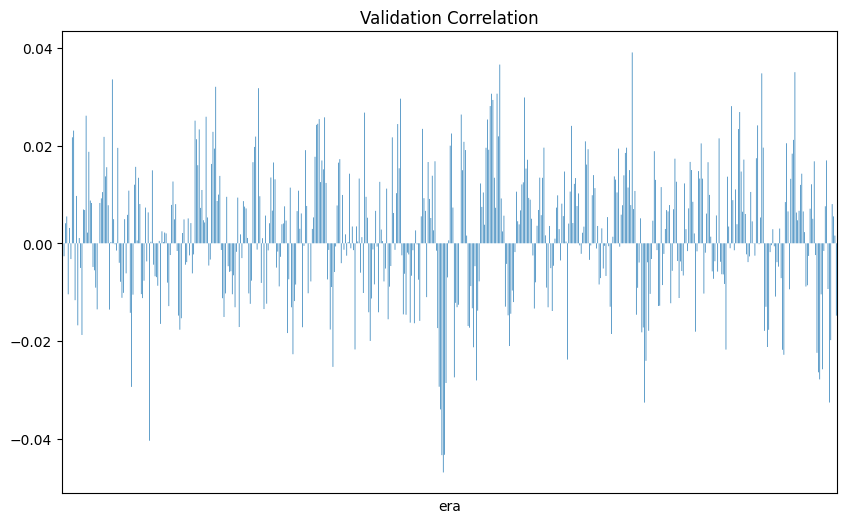

In [28]:
per_era_corr = validation.groupby("era").apply(lambda x: practica_corr(x["prediction"], x["target"]))

per_era_corr.plot(kind="bar", title="Validation Correlation", figsize=(10, 6), xticks=[], snap=False)

En lugar de observar la puntuación "corr" de cada "era", resulta útil observar la puntuación "corr" acumulativa.

Esto se denomina "backtesting" en finanzas cuantitativas, donde las personas simulan el desempeño histórico de sus estrategias de inversión, puede considerar este gráfico como una prueba retrospectiva del desempeño de tu modelo durante el período de validación histórica.

<Axes: title={'center': 'Cumulative Validation Correlation'}, xlabel='era'>

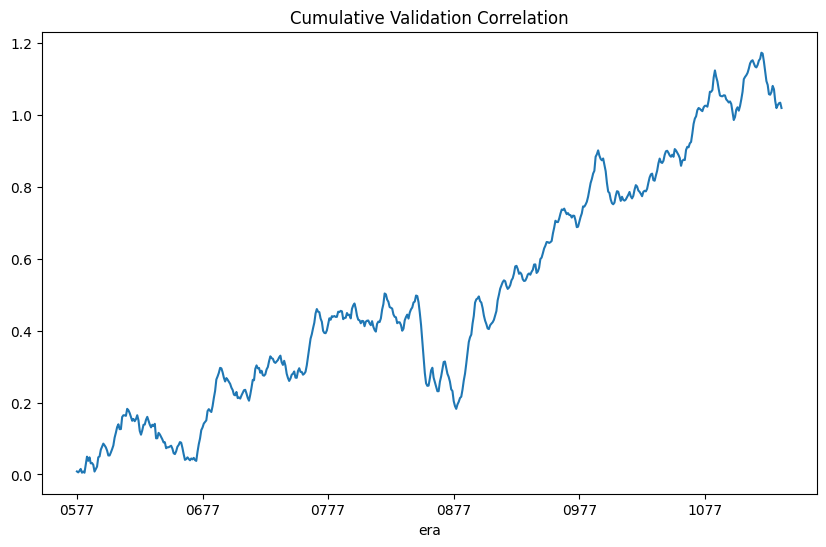

In [29]:
per_era_corr.cumsum().plot(kind="line", title="Cumulative Validation Correlation", figsize=(10, 6))

In [30]:
performance_metrics = calculate_performance_metrics(per_era_corr)
performance_metrics

,Value
mean,0.001814
std,0.013455
sharpe,0.134849
max_drawdown,0.321082


**Mean (Promedio)**:
- **Valor:** 0.001814
- Esto indica el promedio de las correlaciones por era. Es una métrica de qué tan bien están alineadas tus predicciones con el objetivo, en promedio. Un valor positivo es generalmente bueno.

**Standard Deviation (std)**:
- **Valor:** 0.013455
- Representa la variabilidad de las correlaciones entre eras. Una desviación estándar baja indica que el rendimiento es consistente entre diferentes eras.

**Sharpe Ratio**:
- **Valor:** 0.918144
- Es el promedio dividido por la desviación estándar. Este ratio mide la relación entre el rendimiento promedio y la volatilidad. Un Sharpe cercano a 1 es bueno, pero generalmente, valores mayores son más mejores.

**Max Drawdown**:
- **Valor:** 0.321082
- Este es el mayor descenso acumulado en la suma de las correlaciones por eras, una métrica de riesgo. Valores bajos indican menos riesgo de caídas significativas.

- Las métricas muestran un rendimiento positivo. El **Sharpe Ratio** indica que las predicciones son razonablemente consistentes.
- El **Max Drawdown** relativamente bajo es una buena señal de estabilidad, pero trabajar en reducir aún más la variabilidad (**std**) podría mejorar el rendimiento global.

/var/folders/n6/ntyg8jy50s7595_q_x75bhkh0000gn/T/ipykernel_93400/3800752021.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  per_era_corrXG = validationXG.groupby("era").apply(lambda x: practica_corr(x["prediction"], x["target"]))


<Axes: title={'center': 'Validation Correlation XG'}, xlabel='era'>

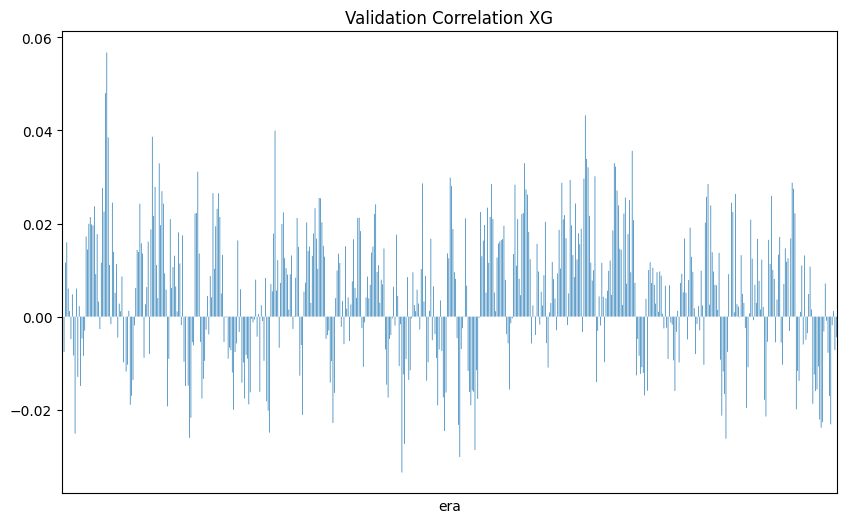

In [31]:
per_era_corrXG = validationXG.groupby("era").apply(lambda x: practica_corr(x["prediction"], x["target"]))

per_era_corrXG.plot(kind="bar", title="Validation Correlation XG", figsize=(10, 6), xticks=[], snap=False)

<Axes: title={'center': 'Cumulative Validation Correlation XG'}, xlabel='era'>

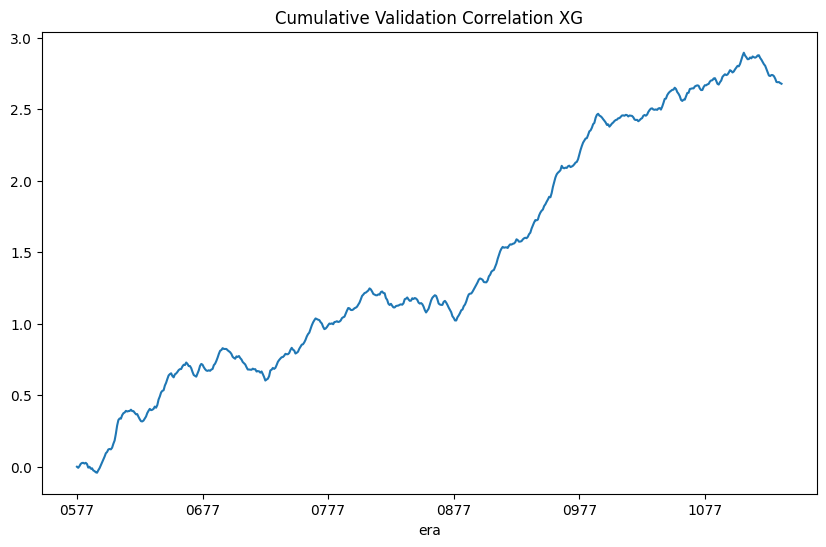

In [32]:
per_era_corrXG.cumsum().plot(kind="line", title="Cumulative Validation Correlation XG", figsize=(10, 6))

In [33]:
performance_metricsXG = calculate_performance_metrics(per_era_corrXG)
performance_metricsXG

,Value
mean,0.004767
std,0.014104
sharpe,0.337981
max_drawdown,0.226334


/var/folders/n6/ntyg8jy50s7595_q_x75bhkh0000gn/T/ipykernel_93400/2913629681.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  per_era_corrRF = validationRf.groupby("era").apply(lambda x: practica_corr(x["prediction"], x["target"]))


<Axes: title={'center': 'Validation Correlation RF'}, xlabel='era'>

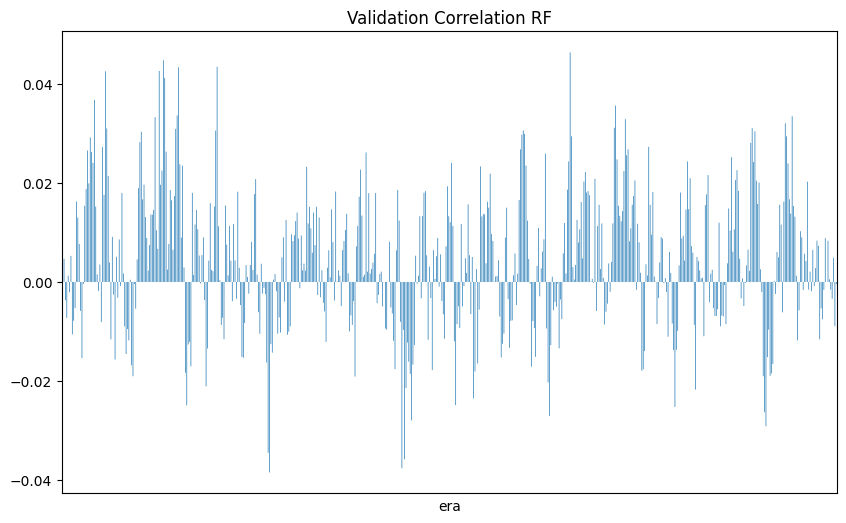

In [34]:
# Calcula la correlación por era entre nuestras predicciones y los valores "target".
per_era_corrRF = validationRf.groupby("era").apply(lambda x: practica_corr(x["prediction"], x["target"]))

# Gráfica de correlación por "era" 
per_era_corrRF.plot(kind="bar", title="Validation Correlation RF", figsize=(10, 6), xticks=[], snap=False)

<Axes: title={'center': 'Cumulative Validation Correlation RF'}, xlabel='era'>

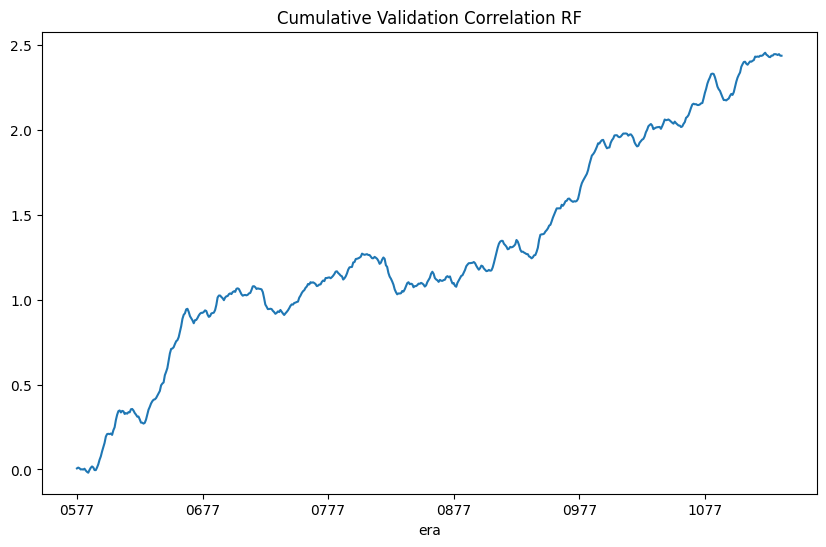

In [35]:

per_era_corrRF.cumsum().plot(kind="line", title="Cumulative Validation Correlation RF", figsize=(10, 6))

In [36]:
performance_metrics = calculate_performance_metrics(per_era_corrRF)
performance_metrics

,Value
mean,0.004335
std,0.013745
sharpe,0.315409
max_drawdown,0.239702


### **Improvement and Investigation**

**¿Qué es la Feature Risk?**

Una cosa que hace que predecir el mercado de valores sea tan difícil es que la relación entre las características “features” y los rendimientos es “no estacionaria”. Es decir, las características que tienen un fuerte poder predictivo durante algunos períodos de tiempo pueden no tenerlo en otros períodos diferentes, o incluso revertirse por completo. Esta incertidumbre es lo que llamamos “feature risk”.

**¿Qué es la Feature Neutralization?**

La **Feature Neutralization** es una técnica utilizada para reducir el riesgo de que las características individuales dominen las predicciones del modelo. En lugar de permitir que el modelo dependa en gran medida de unas pocas características, la neutralización de características ajusta las predicciones para que sean neutrales con respecto a un conjunto de características específicas. Esto se logra restando la proyección de las predicciones en las características seleccionadas.

**¿Cómo Funciona?**
- **Calcular la Proyección**: Para cada característica, se calcula la proyección de las predicciones del modelo en esa característica.
- **Restar la Proyección**: Se resta la proyección de las predicciones originales, haciendo que las predicciones sean neutrales con respecto a esa característica.
- **Repetir para Múltiples Características**: Este proceso se puede repetir para un conjunto de características, reduciendo el riesgo de que cualquier característica individual tenga un impacto desproporcionado en las predicciones.

/var/folders/n6/ntyg8jy50s7595_q_x75bhkh0000gn/T/ipykernel_93400/297972984.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  per_era_corr_neutralized = validation.groupby("era").apply(lambda x: practica_corr(x["neutralized_prediction"], x["target"]))


<Axes: title={'center': 'Validation Correlation (Neutralized)'}, xlabel='era'>

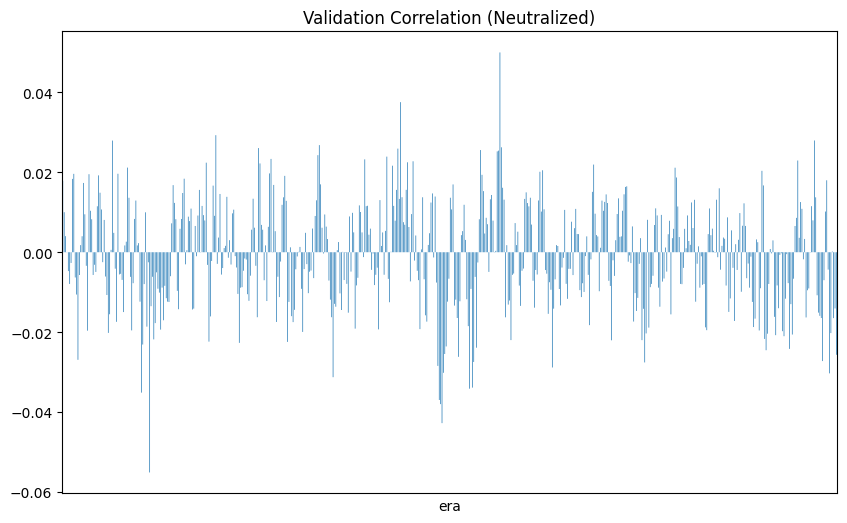

In [37]:
def neutralize(df, columns, neutralizers=None, proportion=1.0):
    if neutralizers is None:
        neutralizers = df.columns
    scores = df[columns].values
    exposures = df[neutralizers].values
    scores -= proportion * exposures.dot(np.linalg.pinv(exposures).dot(scores))
    return scores

neutralized_predictions = neutralize(validation, ["prediction"], feature_cols)

validation["neutralized_prediction"] = neutralized_predictions
per_era_corr_neutralized = validation.groupby("era").apply(lambda x: practica_corr(x["neutralized_prediction"], x["target"]))
per_era_corr_neutralized.plot(kind="bar", title="Validation Correlation (Neutralized)", figsize=(10, 6), xticks=[], snap=False)

Otra mejora que podemos aplicar es la **Ridge Regression**. Esta técnica es útil cuando tenemos muchas características útiles en la predicción. La Ridge Regression agrega una penalización L2 (auque a diferencia de la L1 nunca va a ser "0") a la función de pérdida del modelo, lo que ayuda a reducir el overfitting y mejora la generalización del modelo.

**¿Cómo Funciona?**
1. **Penalización L2**: La Ridge Regression agrega una penalización L2 a la función de pérdida, que es la suma de los cuadrados de los coeficientes del modelo.
2. **Reducción del Overfitting**: Esta penalización ayuda a reducir el overfitting al evitar que los coeficientes del modelo se vuelvan demasiado grandes.
3. **Mejora de la Generalización**: Al reducir el overfitting, la Ridge Regression mejora la capacidad del modelo para generalizar a nuevos datos.

/var/folders/n6/ntyg8jy50s7595_q_x75bhkh0000gn/T/ipykernel_93400/1315503134.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  per_era_corr_ridge = validation.groupby("era").apply(lambda x: practica_corr(x["ridge_prediction"], x["target"]))


<Axes: title={'center': 'Validation Correlation (Ridge)'}, xlabel='era'>

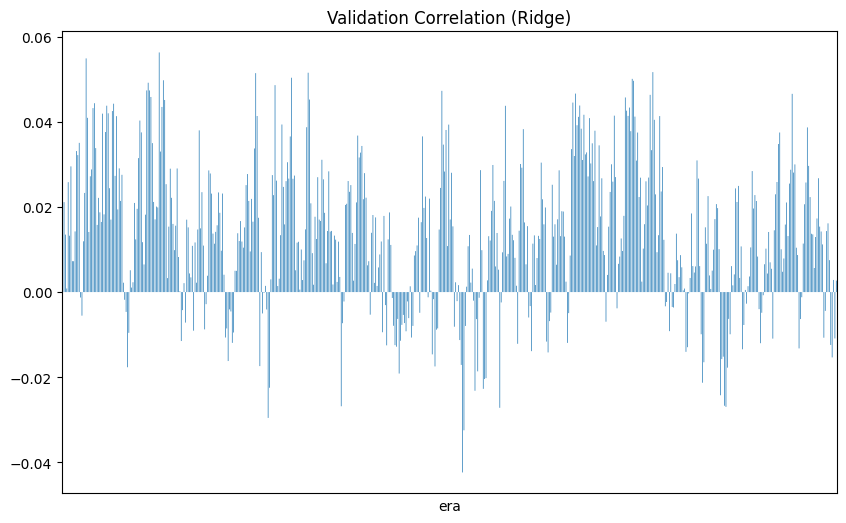

In [38]:
from sklearn.linear_model import Ridge


ridge_model = Ridge(alpha=1.0)
ridge_model.fit(train_scaled[feature_cols], train_scaled["target"])

# Generar predicciones con el modelo Ridge
validation["ridge_prediction"] = ridge_model.predict(validation[feature_cols])

# Evaluar el rendimiento con las predicciones de Ridge
per_era_corr_ridge = validation.groupby("era").apply(lambda x: practica_corr(x["ridge_prediction"], x["target"]))

per_era_corr_ridge.plot(kind="bar", title="Validation Correlation (Ridge)", figsize=(10, 6), xticks=[], snap=False)

### **Guardar modelo**

In [39]:
import cloudpickle

model_FN = "modelLGBMRegressorSmall.pkl"
with open(model_FN, 'wb') as file:
    cloudpickle.dump(model, file)

modelXG_FN = "modelXGBRegressorSmall.pkl"
with open(modelXG_FN, 'wb') as file:
    cloudpickle.dump(modelXG, file)

modelRF_FN = "modelRandomForestRegressorSmall.pkl"
with open(modelRF_FN, 'wb') as file:
    cloudpickle.dump(modelRF, file)

print("done")

done


### **Evaluar con datos en vivo**

In [40]:
modelFileName = "modelLGBMRegressorSmall.pkl"
with open(modelFileName, 'rb') as file:
    loaded_model = cloudpickle.load(file)

modelFileNameXG = "modelXGBRegressorSmall.pkl"
with open(modelFileNameXG, 'rb') as file:
    loaded_modelXG = cloudpickle.load(file)

modelFileNameRF = "modelRandomForestRegressorSmall.pkl"
with open(modelFileNameRF, 'rb') as file:
    loaded_modelRF = cloudpickle.load(file)

print("done")

done


In [41]:
napi.download_dataset("v5.0/live.parquet")
live_features = pd.read_parquet(f"v5.0/live.parquet", columns=feature_cols)

live_predictions = loaded_model.predict(live_features[feature_cols])
live_predictions

2024-12-02 14:34:29,652 INFO numerapi.utils: target file already exists
2024-12-02 14:34:29,653 INFO numerapi.utils: download complete


[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=500


array([0.55864985, 0.42334851, 0.47347699, ..., 0.54037459, 0.49360471,
       0.52843736])

In [42]:
live_predictionsXG = loaded_modelXG.predict(live_features[feature_cols]) 
live_predictionsXG

array([0.51840484, 0.5061867 , 0.5080266 , ..., 0.5245504 , 0.5029483 ,
       0.5019965 ], dtype=float32)

In [43]:
live_predictionsRF = loaded_modelRF.predict(live_features[feature_cols]) 
live_predictionsRF

array([0.51359742, 0.50702232, 0.5121169 , ..., 0.50183104, 0.51665477,
       0.50792837])

**Conclusiones:** Los tres modelos son modelos basados en árboles. Podemos ver que tienden a converger alrededor de 0.50, es decir, a un valor medio, lo cual es normal en la predicción de mercados de valores. Sin embargo, considero que mi modelo de Random Forest es el mejor de todos. Aunque es cierto que los otros dos no están completamente ajustados con los parámetros óptimos para el entrenamiento, para realizar ese ajuste utilizaría librerías específicas como Optuna, ya que no permiten el uso de callbacks como EarlyStopping o GridSearch para la búsqueda de hiperparámetros.
